In [1]:
#Connecting to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Labraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Path to dataset
file_path = '/content/drive/My Drive/Cancer/NEW EFN/EFN_comb.csv'

#Load the dataset
df = pd.read_csv(file_path)

#Extracting class labels from the filename
df['label'] = df['filename'].str.extract(r'^(HSIL|LSIL|SCC|NL)')

#Saving the column with names
filenames = df['filename']

#Removing the column with filenames
df = df.drop(columns=['filename'])

#Checking the dataset size and the first few rows
print(df.shape)
print(df.head())
print(df['label'].value_counts())

(1000, 1281)
          0         1         2         3         4         5         6  \
0 -0.137416  0.341040 -0.097959  2.148081  0.245120 -0.007409 -0.142806   
1 -0.035229 -0.086564 -0.029644  1.549842 -0.060059  0.055052 -0.171211   
2  0.215510  0.209441  0.115661  0.938335 -0.048477 -0.012126 -0.104643   
3 -0.155973 -0.048205  0.036387  1.081434 -0.190611  0.303491  0.061493   
4 -0.157192 -0.019829 -0.129920  0.660346 -0.070028  0.083830 -0.147421   

          7         8         9  ...      1271      1272      1273      1274  \
0  1.257232  0.149551  0.247210  ... -0.184492 -0.230627 -0.127608  0.031763   
1  0.829511 -0.044006  0.165193  ... -0.199437  0.033944 -0.008813 -0.057299   
2  1.156826  0.360729  0.282525  ... -0.028717 -0.034544 -0.077496 -0.146396   
3  0.388517 -0.172633  0.453397  ... -0.155208 -0.172471  0.030381  0.004555   
4  0.191135 -0.046177  0.146965  ...  0.005150 -0.208748  0.313003 -0.022351   

       1275      1276      1277      1278      1279  la

In [4]:
#Splitting data and labels
Features = df.drop(columns=['label'])
Labels = df['label']

#Scaling
scaler = StandardScaler()
Features_scaled = scaler.fit_transform(Features)

#Applying PCA
pca = PCA()
Features_pca = pca.fit_transform(Features_scaled)

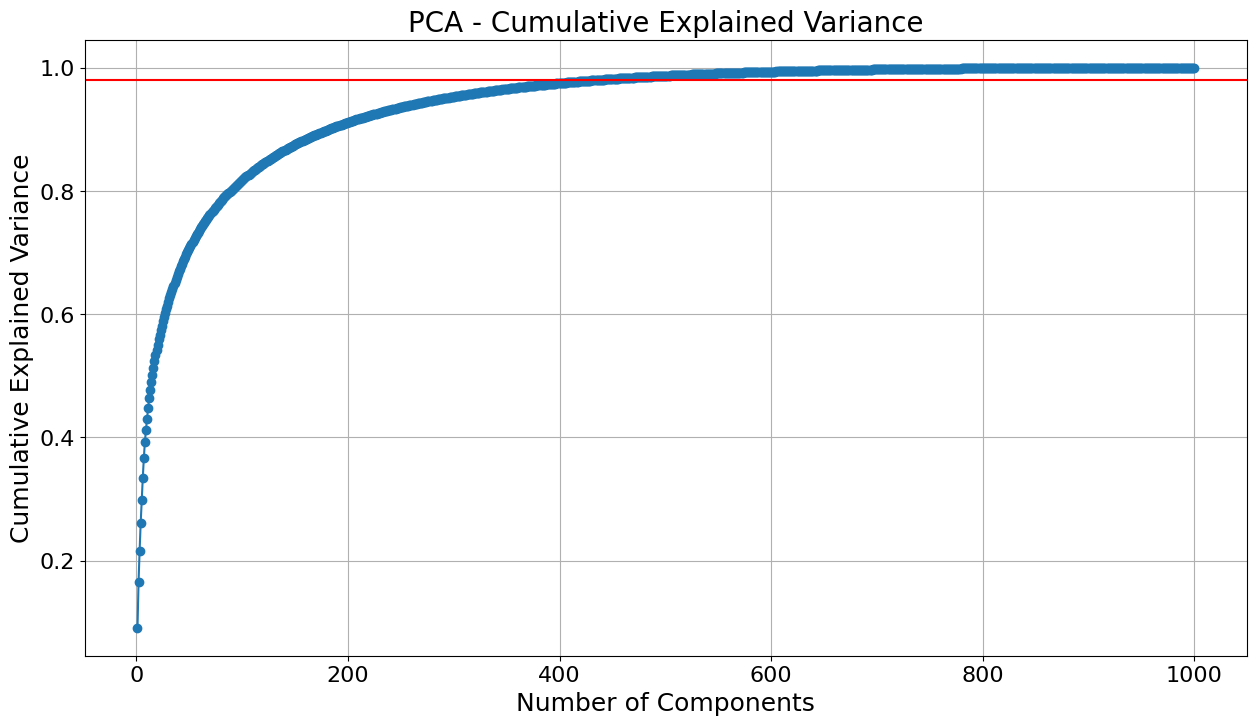

In [5]:
#Plotting the explained variance graph
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(15, 8))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', markersize=6)
plt.axhline(y=0.98, color='r', linestyle='-')
plt.xlabel('Number of Components', fontsize=18)
plt.ylabel('Cumulative Explained Variance', fontsize=18)
plt.title('PCA - Cumulative Explained Variance', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(True)
plt.show()

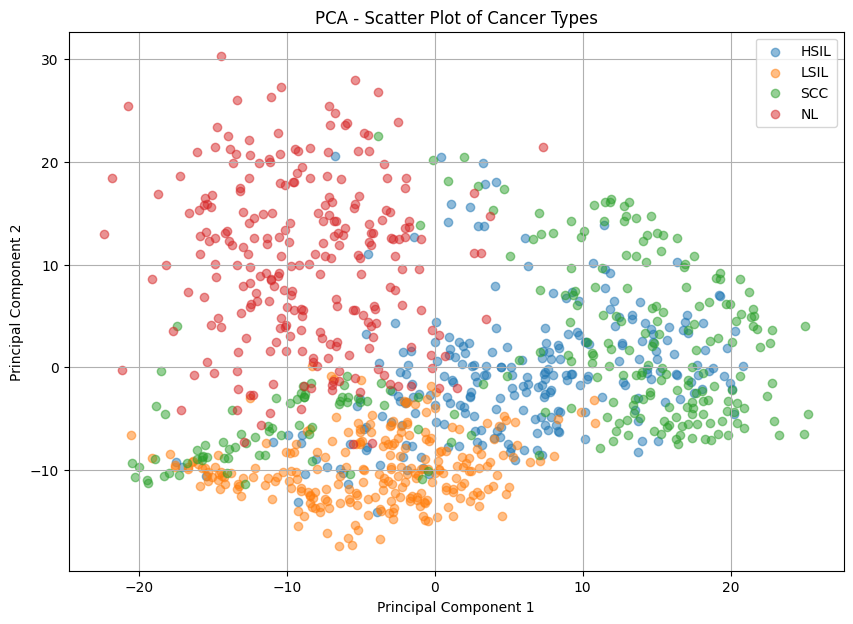

In [8]:
# Applying PCA with two components for visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(Features_scaled)

# Creating a DataFrame with PCA results and class labels
pca_df_2d = pd.DataFrame(data=X_pca_2d, columns=['PC1', 'PC2'])
pca_df_2d['label'] = Labels

# Creating a scatter plot for visualization
plt.figure(figsize=(10, 7))
for label in pca_df_2d['label'].unique():
    subset = pca_df_2d[pca_df_2d['label'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Scatter Plot of Cancer Types')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
#Applying PCA with a selected number of components
n_components = 400
pca = PCA(n_components=n_components)
Features_pca_400 = pca.fit_transform(Features_scaled)

#DataFrame with PCA components and original filenames
pca_df_final = pd.DataFrame(data=Features_pca_400, columns=[f'PC{i+1}' for i in range(n_components)])
pca_df_final.insert(0, 'filename', filenames)

#Checking order
original_order_check = (pca_df_final['filename'].values == filenames.values).all()
print("Filename order: ", original_order_check)

#Saving the new dataset
new_file_path = '/content/drive/My Drive/Cancer/NEW EFN/EFN_comb_pca123.csv'
pca_df_final.to_csv(new_file_path, index=False)

print("New dataset saved at:", new_file_path)

Filename order:  True
New dataset saved at: /content/drive/My Drive/Cancer/NEW EFN/EFN_comb_pca123.csv
